# **Liner Regression with Numpy and OpenFL**

Requirements:
1. Install OpenFL
2. Clone the OpenFL repository, it contains infrastrcture configs for this example.
3. Change the working directory.

In [1]:
!pip install openfl
!git clone https://github.com/intel/openfl.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 535 kB 5.1 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 200 kB 64.8 MB/s 
     |████████████████████████████████| 4.1 MB 58.1 MB/s 
     |████████████████████████████████| 596 kB 49.4 MB/s 
     |████████████████████████████████| 4.0 MB 3.0 MB/s 
     |████████████████████████████████| 146 kB 53.4 MB/s 
     |████████████████████████████████| 2.5 MB 52.1 MB/s 
     |████████████████████████████████| 8.8 MB 39.4 MB/s 
     |████████████████████████████████| 161 kB 73.3 MB/s 
     |████████████████████████████████| 125 kB 56.7 MB/s 
     |████████████████████████████████| 51 kB 8.0 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 344 kB 51.4 MB/s 
     |████████████████████████████████| 9.7 MB 48.5 MB/s 
     |████████████████████████████████|

Cloning into 'openfl'...
remote: Enumerating objects: 4827, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 4827 (delta 101), reused 122 (delta 31), pack-reused 4591
Receiving objects: 100% (4827/4827), 118.29 MiB | 36.03 MiB/s, done.
Resolving deltas: 100% (2769/2769), done.


In [2]:
import os
from time import sleep
os.chdir ('./openfl/openfl-tutorials/interactive_api/numpy_linear_regression/workspace')

## Changing the work directory

In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 420 kB 5.2 MB/s 
  Attempting uninstall: openfl
    Found existing installation: openfl 1.3
    Uninstalling openfl-1.3:
      Successfully uninstalled openfl-1.3


In [4]:
from typing import List, Union
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 7,5

# %matplotlib inline function allows for plots to be visible when using Jupyter Notebook.
# Width 7 inches and height 5 inches of the graph.

# **Descibing a linear model and training it locally**

We are using MSE as loss function and Ridge weights regularization.
![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2016/01/eq5-1.png)

Weight regularization is being used as it penalizes the weight matrices of nodes. Weight regularization results in simpler linear network.

In [5]:
class LinRegLasso:
    def __init__(self, n_feat: int) -> None:
        self.weights = np.ones((n_feat + 1)) # (n_feat + 1,) weights + bias
        
    def predict(self, feature_vector: Union[np.ndarray, List[int]]) -> float:

      # feature_vector can be a list or have a shape (n_feat,). 
      #It may also have a bunch of vectors (n_vec,nfeat)

        feature_vector = np.array(feature_vector)
        if len(feature_vector.shape) == 1:
            feature_vector = feature_vector[:,np.newaxis]
        assert feature_vector.shape[-1] == self.weights.shape[0] - 1, \
            f"sample shape is {feature_vector.shape} and weights shape is f{self.weights}"
        
        return self.weights @ np.concatenate((feature_vector.T, [[1]*feature_vector.shape[0]]))
    
    def mse(self, X: np.ndarray, Y: np.ndarray) -> float:
        Y_hat = self.predict(X)
        return np.sum((Y - Y_hat)**2) / Y.shape[0]

    def _update_weights(self, X: np.ndarray, Y: np.ndarray, lr: float, wd: float) -> None:
        '''
        X: (n_samples, n_features)
        Y: (n_samples,)
        self.weights: (n_features + 1)
        
        Cost function is MSE: (y - W*X - b)**2;
        its derivative with resp to any x is -2*X*(y - W*X - b),
        and with resp to b is -2*(y - W*X - b).
        
        Regularisation function is L1 |W|;
        its derivative is SIGN(w)
        '''
        predictions = self.predict(X)
        error = Y - predictions # (n_samples,)
        X_with_bias = np.concatenate((X.T, [[1]*X.shape[0]])).T
        updates = -2 * X_with_bias.T @ error / Y.shape[0]
        regression_term = np.sign(self.weights)
        
        self.weights = self.weights - lr * updates + wd * regression_term
    
    def fit(self, X: np.ndarray, Y: np.ndarray,
            n_epochs: int, lr: float, wd: float,
            silent: bool=False) -> None:
        for i in range(n_epochs):
            self._update_weights(X, Y, lr, wd)
            mse = self.mse(X, Y)
            if not silent:
                print(f'epoch: {i}, \t MSE: {mse}')

In [ ]:
''' The code is trying to predict the value of a feature vector. The code uses a function called predict 
which takes in an input feature vector and return a predicted value.

The code creates an array with shape (n_feat) where n_feat is the number of features in the dataset.
It uses np.newaxis to create a new axis for this array so that it has shape. It asserts that there are 
at least two dimension in this new axis.

The code also tries to predict the outcome of a regression problem. For this it has an instance LinRegLasso
with n_feat as the number of features in the dataset. A list is created that contains all the weights and 
biases for the model and the prediction is done using the feature vector provided.

The code is then calculating the mean squared error between the predicted value and the actual value. For 
this the code takes two input parameters X and Y and then return the mean squared error betweent he predicted
output of X and the actual output of Y. The code is also defining an array with shape[n_feautres, 1] where
n_features is the number of features used in the predicting X.

'''

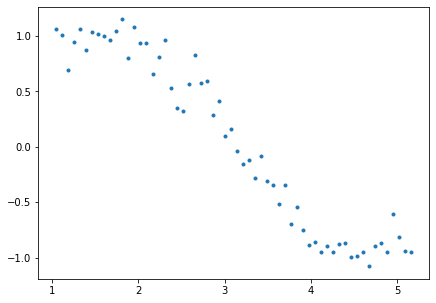

In [26]:
# Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  # Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
plt.plot(x,y,'.')

#in np.random.noraml they have considered noise to be 0.15

In [9]:
lr_model = LinRegLasso(1)
wd = 0.0001
lr = 0.08
epochs = 100

print(f"Initial MSE: {lr_model.mse(x,y)}")
lr_model.fit(x[:,np.newaxis],y, epochs, lr, wd, silent=True)
print(f"Final MSE: {lr_model.mse(x,y)}")
print(f"Final parameters: {lr_model.weights}")

Initial MSE: 20.442839563960476
Final MSE: 0.05885962951284364
Final parameters: [-0.56894409  1.784573  ]


In [ ]:
''' The code starts by creating a liner regression model. The code fits/trains the linear regression model
using 100 epochs, which is equivalent to 10,000 iterations in this case. It also uses a learning rate of 0.08
and an initial weighting paramerter of 1 for each feature 'x'.

'''

In [27]:
# We can also solve this 1D problem using Numpy
numpy_solution = np.polyfit(x,y,1)
predictor_np = np.poly1d(numpy_solution)
numpy_solution

array([-0.61957457,  1.9628557 ])

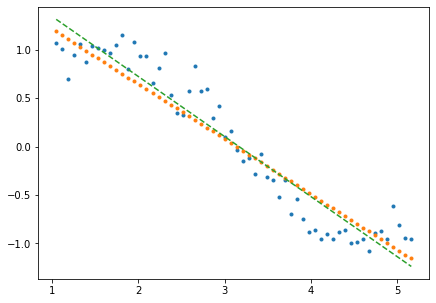

In [11]:
y_hat = lr_model.predict(x)
y_np = predictor_np(x)
plt.plot(x,y,'.')
plt.plot(x,y_hat,'.')
plt.plot(x,y_np,'--')

# **Running the same training on federated data**

Start the Director service and several envoys with generated data


In [17]:
# Here are the main parameters for our Federation
n_cols=10 # Number of Envoys / Collaborators
n_samples_per_col=10
noise=0.15

In [18]:
import os
from pathlib import Path
import yaml
from typing import Dict, List, Union

Start the Director Service

In [19]:
cwd = Path.cwd()
director_workspace_path = Path('../director/').absolute()
director_config_file = director_workspace_path / 'director_config.yaml'
director_logfile = director_workspace_path / 'director.log'
if director_logfile.is_file(): director_logfile.unlink()

os.environ['main_folder'] = str(cwd)
os.environ['director_workspace_path'] = str(director_workspace_path)
os.environ['director_logfile'] = str(director_logfile)
os.environ['director_config_file'] = str(director_config_file)

In [20]:
%%script /bin/bash --bg
cd $director_workspace_path
fx director start --disable-tls -c $director_config_file > $director_logfile &
cd $main_folder

Starting job # 2 in a separate thread.


# **Start Envoys**

First, we create several envou config files

In [21]:
# Read the original envoy config file content
with open(Path('../envoy/envoy_config.yaml'), "r") as stream:
    orig_config = yaml.safe_load(stream)

def generate_envoy_configs(config: Dict,
                           save_path: Union[str, Path] = '../envoy/',
                           n_cols: int = 10,
                           n_samples_per_col: int = 10,
                           noise: float = 0.15) -> List[Path]:

    config['shard_descriptor']['params']['n_samples'] = n_samples_per_col
    config['shard_descriptor']['params']['noise'] = noise
    
    config_paths = [(Path(save_path) / f'{i}_envoy_config.yaml').absolute()
                for i in range(1, n_cols + 1)]

    for i, path in enumerate(config_paths):
        config['shard_descriptor']['params']['rank'] = i
        with open(path, "w") as stream:
            yaml.safe_dump(config, stream)
            
    return config_paths
            
def remove_configs(config_paths):
    for path in config_paths:
        path.unlink()

In [22]:
config_paths = generate_envoy_configs(orig_config,
                                      n_cols=n_cols,
                                      n_samples_per_col=n_samples_per_col,
                                      noise=noise)
# remove_configs(config_paths)

Starting the Envoy processes in a loop

In [23]:
# envoy_workspace_path = Path('../envoy/').absolute()
def start_envoys(config_paths: List[Path]) -> None:
    envoy_workspace_path = config_paths[0].parent
    cwd = Path.cwd()
    os.chdir(envoy_workspace_path)
    for i, path in enumerate(config_paths):
        os.system(f'fx envoy start -n env_{i + 1} --disable-tls '
                  f'--envoy-config-path {path} -dh localhost -dp 50049 '
                  f'>env_{i + 1}.log &')
    os.chdir(cwd)

sleep(5)

start_envoys(config_paths)

sleep(25)

# **Connect to the Director service of out Federation as Data Scientist.**

In [24]:
# Create a federation
from openfl.interface.interactive_api.federation import Federation

# please use the same identificator that was used in signed certificate
client_id = 'frontend'
director_node_fqdn = 'localhost'
director_port = 50049

federation = Federation(
    client_id=client_id,
    director_node_fqdn=director_node_fqdn,
    director_port=director_port,
    tls=False
)

In [28]:
# Data scientist may request a list of connected envoys
shard_registry = federation.get_shard_registry()

# WARNING!

# Make sure shard registry contains all the envoys you started!
# In other case try to run this cell again or reconnect to the Director (the cell above).
shard_registry

{'env_10': {'current_time': '2022-08-12 16:33:55',
  'experiment_name': 'ExperimentName Mock',
  'is_experiment_running': False,
  'is_online': True,
  'last_updated': '2022-08-12 16:33:53',
  'shard_info': node_info {
    name: "env_10"
  }
  shard_description: "Allowed dataset types are `train` and `val`"
  sample_shape: "1"
  target_shape: "1",
  'valid_duration': seconds: 10},
 'env_3': {'current_time': '2022-08-12 16:33:55',
  'experiment_name': 'ExperimentName Mock',
  'is_experiment_running': False,
  'is_online': True,
  'last_updated': '2022-08-12 16:33:53',
  'shard_info': node_info {
    name: "env_3"
  }
  shard_description: "Allowed dataset types are `train` and `val`"
  sample_shape: "1"
  target_shape: "1",
  'valid_duration': seconds: 10},
 'env_4': {'current_time': '2022-08-12 16:33:55',
  'experiment_name': 'ExperimentName Mock',
  'is_experiment_running': False,
  'is_online': True,
  'last_updated': '2022-08-12 16:33:53',
  'shard_info': node_info {
    name: "env_4

**Code**

In [29]:
from openfl.interface.interactive_api.experiment import TaskInterface, DataInterface, ModelInterface, FLExperiment

class LinRegDataSet(DataInterface):
    def __init__(self, **kwargs):
        """Initialize DataLoader."""
        self.kwargs = kwargs
        pass

    @property
    def shard_descriptor(self):
        """Return shard descriptor."""
        return self._shard_descriptor
    
    @shard_descriptor.setter
    def shard_descriptor(self, shard_descriptor):
        """
        Describe per-collaborator procedures or sharding.

        This method will be called during a collaborator initialization.
        Local shard_descriptor  will be set by Envoy.
        """
        self._shard_descriptor = shard_descriptor
        self.train_set = shard_descriptor.get_dataset("train")
        self.val_set = shard_descriptor.get_dataset("val")

    def get_train_loader(self, **kwargs):
        """Output of this method will be provided to tasks with optimizer in contract."""
        return self.train_set

    def get_valid_loader(self, **kwargs):
        """Output of this method will be provided to tasks without optimizer in contract."""
        return self.val_set

    def get_train_data_size(self):
        """Information for aggregation."""
        return len(self.train_set)

    def get_valid_data_size(self):
        """Information for aggregation."""
        return len(self.val_set)
    
lin_reg_dataset = LinRegDataSet()

**Model**


In [30]:
# You can inspect the framework adapter used in this example.
# It is a plug-in component allowing OpenFL to manage model parameters.
framework_adapter = 'custom_adapter.CustomFrameworkAdapter'
fed_model = LinRegLasso(1)
MI = ModelInterface(model=fed_model, optimizer=None, framework_plugin=framework_adapter)

# Save the initial model state
initial_model = LinRegLasso(1)

**Tasks**

Using an Optimizer does not make sense for this experiment. Yet it is a required part of a training task contract in the current version of OpenFL, so we just pass None. We need to employ a trick reporting metrics. OpenFL decides which model is the best based on an increasing metric

In [31]:
TI = TaskInterface()

@TI.add_kwargs(**{'lr': 0.001,
                   'wd': 0.0001,
                   'epoches': 1})
@TI.register_fl_task(model='my_model', data_loader='train_data', \
                     device='device', optimizer='optimizer')     
def train(my_model, train_data, optimizer, device, lr, wd, epoches):
    X, Y = train_data[:,:-1], train_data[:,-1]
    my_model.fit(X, Y, epochs, lr, wd, silent=True)
    return {'train_MSE': my_model.mse(X, Y),}

@TI.register_fl_task(model='my_model', data_loader='val_data', device='device')     
def validate(my_model, val_data, device):
    X, Y = val_data[:,:-1], val_data[:,-1]        
    return {'validation_MSE': my_model.mse(X, Y),}

**Run**

In [32]:
experiment_name = 'linear_regression_experiment'
fl_experiment = FLExperiment(federation=federation, experiment_name=experiment_name,
                            )

In [33]:
fl_experiment.start(model_provider=MI, 
                    task_keeper=TI,
                    data_loader=lin_reg_dataset,
                    rounds_to_train=10,)